<a href="https://colab.research.google.com/github/maulanadfr/datascience/blob/main/Data_Science_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [55]:
!git clone https://github.com/maulanadfr/datascience.git

fatal: destination path 'datascience' already exists and is not an empty directory.


In [3]:
import pandas as pd

# read data from csv file
df2 = pd.read_csv('https://raw.githubusercontent.com/maulanadfr/datascience/master/train.csv')
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df2[(df2["Sex"]=="male") & (df2["Survived"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


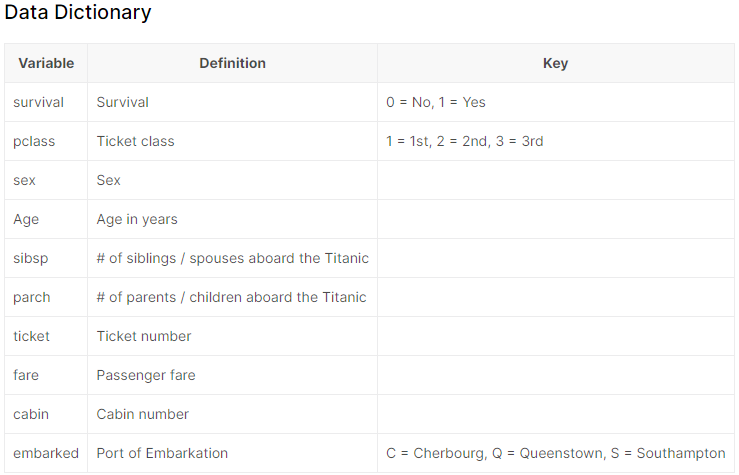

# 2. Data Preprocessing

## Handle Missing Values

In [6]:
for i in df2.columns:
  if df2[i].isnull().sum() != 0:
    print(f"{i} =", df2[i].isnull().sum())
  else:
    pass

Age = 177
Cabin = 687
Embarked = 2


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
null_val = df2[df2['Age'].isnull()]
null_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
null_val[null_val['Sex']=='female'].count()

PassengerId    53
Survived       53
Pclass         53
Name           53
Sex            53
Age             0
SibSp          53
Parch          53
Ticket         53
Fare           53
Cabin           7
Embarked       53
dtype: int64

In [12]:
df2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [13]:
df2[df2['Cabin']=='C23 C25 C27']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [14]:
counts = df2['Cabin'].value_counts().sort_values(ascending=False)
mode = counts.index[0]
print(mode)

B96 B98


In [19]:
df_new = df2.drop(labels=['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=False)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


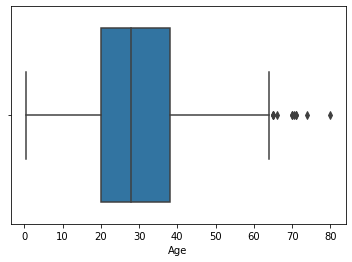

In [20]:
col = df_new['Age']

# Create the plot
sns.boxplot(x=col)

In [23]:
df_new['Embarked'] = df_new['Embarked'].fillna(df_new['Embarked'].mode()[0])
df_new['Age'] = df_new.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.median()))

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


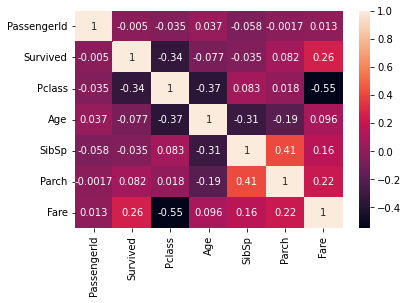

In [25]:
corr = df2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

## Handle Outlier

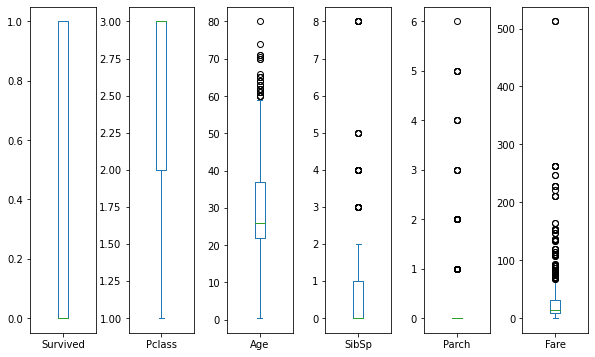

In [26]:
df_new.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [28]:
df_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df_new['Age'] = df_new['Age'].apply(lambda x: int(math.ceil(x)))

In [35]:
# outlier_df = ['Age', 'Fare']
# for i in outlier_df:
#   q25 = df_new[i].quantile(0.25)
#   q75 = df_new[i].quantile(0.75)

#   # Create a mask that identifies the values that need to be replaced
#   mask = (df_new[i] < q25) | (df_new[i] > q75)

#   # Replace the values that need to be replaced with the median
#   df_new[i] = df_new[i].mask(mask, df_new[i].median())



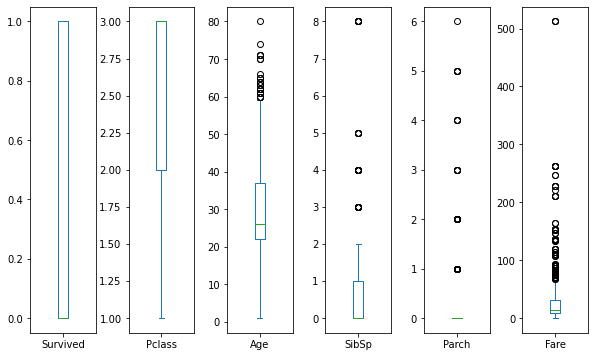

In [36]:
df_new.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

## Feature Engineering

In [38]:
df_new['Pclass'].unique()

array([3, 1, 2])

In [39]:
# creating instance of one hot encoder
encoder = OneHotEncoder()

# perform one hot encoder on a dataframe
encoder_df = pd.DataFrame(encoder.fit_transform(df_new[['Sex', 'Embarked']]).toarray())

# merge dataframe that has been encoded with the original dataframe
df_encoded = df_new.join(encoder_df)
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,0,3,male,22,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,1,1,female,19,0,0,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,0,3,female,24,1,2,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,1,1,male,26,0,0,30.0000,C,0.0,1.0,1.0,0.0,0.0


In [40]:
# drop the column that has been encoded
df_encoded = df_encoded.drop(labels=['Sex', 'Embarked'], axis=1)
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,0,3,22,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,24,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [42]:
df_encoded = df_encoded.rename(columns={0:'Female', 1:'Male', 2:'C', 3:'Q', 4:'S'})

In [43]:
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S
0,0,3,22,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,24,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


# 3. Data Modelling

## Train Test Split

In [44]:
x = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
print(x_train.shape)
print(x_test.shape)

(712, 10)
(179, 10)


## Selecting Algorithm Machine Learning Model

In [47]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

## Model Evaluation

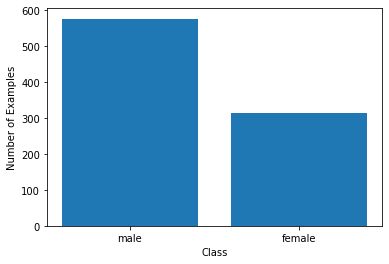

In [48]:
class_counts = df2["Sex"].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of Examples")
plt.show()

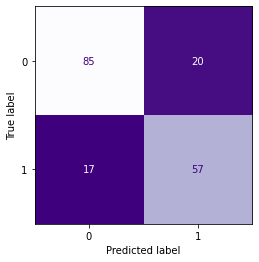

In [49]:
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [51]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [52]:
result = metrics_calculator(y_test, y_pred, 'Decision Trees')
result

,Decision Trees
Accuracy,0.793296
Precision,0.786797
Recall,0.789897
F1-score,0.788111
